In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv("cps_85_wages.csv")

In [4]:
df

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
529,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,17,no,female,25,member,23.25,48,Other,Professional,Other,Married
532,12,yes,male,13,member,19.88,31,White,Professional,Other,Married


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUCATION   534 non-null    int64  
 1   SOUTH       534 non-null    object 
 2   SEX         534 non-null    object 
 3   EXPERIENCE  534 non-null    int64  
 4   UNION       534 non-null    object 
 5   WAGE        534 non-null    float64
 6   AGE         534 non-null    int64  
 7   RACE        534 non-null    object 
 8   OCCUPATION  534 non-null    object 
 9   SECTOR      534 non-null    object 
 10  MARR        534 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 46.0+ KB


In [6]:
df.describe()

,EDUCATION,EXPERIENCE,WAGE,AGE
count,534.000000,534.000000,534.000000,534.000000
mean,13.018727,17.822097,9.024064,36.833333
std,2.615373,12.379710,5.139097,11.726573
min,2.000000,0.000000,1.000000,18.000000
25%,12.000000,8.000000,5.250000,28.000000
50%,12.000000,15.000000,7.780000,35.000000
75%,15.000000,26.000000,11.250000,44.000000
max,18.000000,55.000000,44.500000,64.000000


In [7]:
df.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


<AxesSubplot: xlabel='AGE', ylabel='EXPERIENCE'>

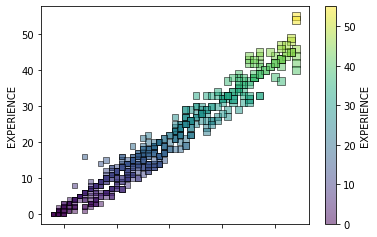

In [8]:
df.plot(kind = 'scatter', x='AGE' ,y = 'EXPERIENCE', alpha = 0.5, cmap = 'viridis',c='EXPERIENCE', marker = 's', s='AGE', edgecolor= 'black')

<AxesSubplot: xlabel='AGE', ylabel='WAGE'>

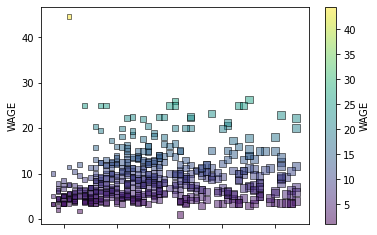

In [9]:
df.plot(kind = 'scatter', x='AGE' ,y = 'WAGE', alpha = 0.5, cmap = 'viridis',c='WAGE', marker = 's', s='AGE', edgecolor= 'black')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EDUCATION   534 non-null    int64  
 1   SOUTH       534 non-null    object 
 2   SEX         534 non-null    object 
 3   EXPERIENCE  534 non-null    int64  
 4   UNION       534 non-null    object 
 5   WAGE        534 non-null    float64
 6   AGE         534 non-null    int64  
 7   RACE        534 non-null    object 
 8   OCCUPATION  534 non-null    object 
 9   SECTOR      534 non-null    object 
 10  MARR        534 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 46.0+ KB


# Pivot Table
- A PivotTable is an interactive way to quickly summarize large amounts of data. You can use a PivotTable to analyze numerical data in detail, and answer unanticipated questions about your data. A PivotTable is especially designed for: Querying large amounts of data in many user-friendly ways.


In [17]:
df.pivot_table(values='AGE',index= 'SECTOR',aggfunc=['mean','max','min','median'])

,mean,max,min,median
,AGE,AGE,AGE,AGE
SECTOR,,,,
Construction,40.083333,61,20,42.5
Manufacturing,37.838384,64,19,35.0
Other,36.401460,64,18,35.0


In [19]:
df.pivot_table(values='AGE',index= 'SECTOR',columns = 'SEX') #by default ot gives average

SEX,female,male
SECTOR,,
Construction,57.500000,38.500000
Manufacturing,38.666667,37.300000
Other,37.490196,35.328502


# Plot using .plot() function

<AxesSubplot: xlabel='SECTOR'>

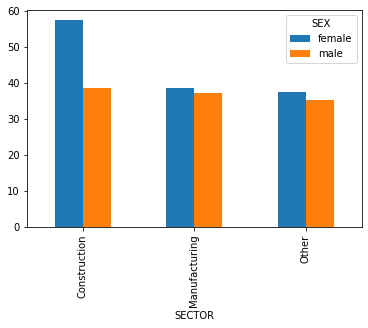

In [21]:
df.pivot_table(values='AGE',index= 'SECTOR',columns = 'SEX').plot(kind='bar')

<AxesSubplot: xlabel='SECTOR'>

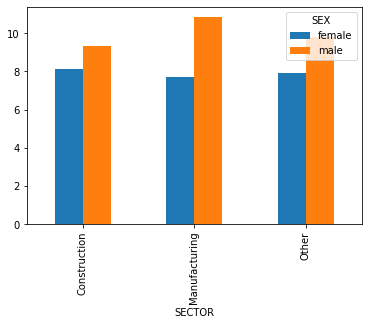

In [22]:
df.pivot_table(values='WAGE',index= 'SECTOR',columns = 'SEX').plot(kind='bar')

# Filtering data using boolean filtering

In [24]:
df['SECTOR']=='Manufacturing'   # this is a boolean filter

0       True
1       True
2       True
3      False
4      False
       ...  
529    False
530    False
531    False
532    False
533     True
Name: SECTOR, Length: 534, dtype: bool

## Only show manufacturing sector rows

In [25]:
df[df['SECTOR']=='Manufacturing'] # boolean filtering

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
8,16,no,male,11,not_member,13.28,33,White,Other,Manufacturing,Married
11,12,no,male,19,member,11.50,37,White,Other,Manufacturing,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
484,17,no,male,3,not_member,20.40,26,White,Professional,Manufacturing,Unmarried
486,14,no,male,19,not_member,16.42,39,White,Professional,Manufacturing,Unmarried
496,18,no,female,37,not_member,22.83,61,White,Professional,Manufacturing,Unmarried
521,16,no,male,17,not_member,22.50,39,White,Professional,Manufacturing,Married


## Inverse of above can be done using '~'

In [26]:
df[~(df['SECTOR']=='Manufacturing')] # boolean filtering

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
5,13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
6,10,yes,male,27,not_member,4.45,43,White,Other,Other,Unmarried
7,12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
528,16,no,female,6,member,11.79,28,White,Professional,Other,Unmarried
529,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,17,no,female,25,member,23.25,48,Other,Professional,Other,Married


In [28]:
explt10= df['EXPERIENCE']<=10 # boolean filter
df[explt10]

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
5,13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
7,12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
9,12,no,male,9,not_member,8.75,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
522,16,no,male,10,member,7.50,32,White,Professional,Other,Married
523,17,yes,male,2,not_member,7.00,25,White,Professional,Other,Married
526,15,no,male,10,not_member,12.50,31,White,Professional,Other,Unmarried
528,16,no,female,6,member,11.79,28,White,Professional,Other,Unmarried


<AxesSubplot: >

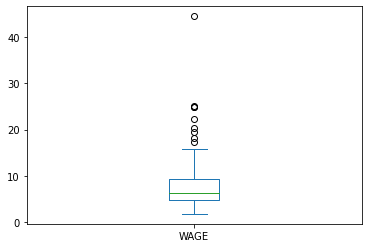

In [32]:
df[explt10].plot(kind='box',x='EXPERIENCE',y= 'WAGE')

# GROUPBY

## Sorting

In [33]:
df

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
529,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,17,no,female,25,member,23.25,48,Other,Professional,Other,Married
532,12,yes,male,13,member,19.88,31,White,Professional,Other,Married


In [34]:
df.sort_values(by = 'AGE')

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
443,16,no,female,0,not_member,10.00,18,White,Professional,Other,Unmarried
398,12,no,female,0,not_member,3.35,18,White,Service,Other,Unmarried
298,12,no,female,0,not_member,5.00,18,White,Clerical,Other,Unmarried
40,12,no,male,0,not_member,3.35,18,White,Other,Other,Unmarried
54,13,no,male,0,not_member,4.00,19,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
230,14,yes,male,44,not_member,19.98,64,White,Sales,Other,Married
31,12,yes,female,46,not_member,4.00,64,White,Other,Other,Unmarried
62,3,yes,male,55,not_member,7.00,64,Hispanic,Other,Manufacturing,Married
331,16,no,female,42,not_member,11.71,64,White,Clerical,Manufacturing,Unmarried


## But dataframe is not sorted

In [35]:
df

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
529,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,17,no,female,25,member,23.25,48,Other,Professional,Other,Married
532,12,yes,male,13,member,19.88,31,White,Professional,Other,Married


## Inplace says output mat dikaho df ko update kardo

In [36]:
df.sort_values(by = 'AGE',inplace= True)

In [37]:
df

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
443,16,no,female,0,not_member,10.00,18,White,Professional,Other,Unmarried
398,12,no,female,0,not_member,3.35,18,White,Service,Other,Unmarried
298,12,no,female,0,not_member,5.00,18,White,Clerical,Other,Unmarried
40,12,no,male,0,not_member,3.35,18,White,Other,Other,Unmarried
54,13,no,male,0,not_member,4.00,19,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
230,14,yes,male,44,not_member,19.98,64,White,Sales,Other,Married
31,12,yes,female,46,not_member,4.00,64,White,Other,Other,Unmarried
62,3,yes,male,55,not_member,7.00,64,Hispanic,Other,Manufacturing,Married
331,16,no,female,42,not_member,11.71,64,White,Clerical,Manufacturing,Unmarried


In [39]:
df.sort_values(by = ['RACE','WAGE'],ascending=[False,True]) # Race in DESC and Wage in ASC

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
199,12,no,male,24,not_member,1.00,42,White,Management,Other,Married
378,12,yes,female,5,not_member,1.75,23,White,Service,Other,Married
415,13,yes,male,0,not_member,2.01,19,White,Service,Other,Unmarried
92,12,no,male,1,not_member,2.85,19,White,Other,Other,Unmarried
282,12,yes,female,28,not_member,3.00,46,White,Clerical,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...
306,13,no,male,16,not_member,9.10,35,Hispanic,Clerical,Other,Unmarried
195,16,no,male,7,member,10.00,29,Hispanic,Management,Other,Married
160,12,yes,female,30,not_member,11.25,48,Hispanic,Management,Other,Married
502,17,no,male,18,not_member,24.98,41,Hispanic,Professional,Other,Married


In [41]:
df.sort_values(by = ['RACE','WAGE'],ascending=[False,True],inplace=True) # Race in DESC and Wage in ASC and update dataframe

## Now lets see GroupBy

### Per occupation Experience ka mean

In [43]:
df.groupby('OCCUPATION')['EXPERIENCE'].agg(['mean','min','max','median','std'])

,mean,min,max,median,std
OCCUPATION,,,,,
Clerical,17.577320,0,45,15.0,12.124214
Management,18.072727,1,42,15.0,11.375501
Other,18.064103,0,55,15.0,12.448438
Professional,15.457143,0,42,13.0,10.275090
Sales,18.447368,0,45,15.5,13.492135
Service,20.192771,0,54,17.0,14.718876
